In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi
from transit import System, Central, Body

In [3]:
def measure_duration(ts, fs):
    first = np.where(fs<1)[0][0]
    last = np.where(fs<1)[0][-1]
    return ts[last] - ts[first]

winn: 0.402086338545, transit: 0.401680336067 (omega=0.000)
winn: 0.26805755903, transit: 0.0888177635527 (omega=1.571)
winn: 0.402086338545, transit: 0.401680336067 (omega=3.142)
winn: 0.80417267709, transit: 2.41088217644 (omega=4.712)


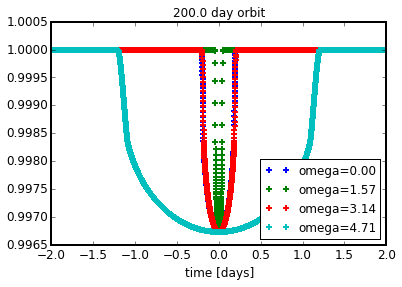

In [13]:
P = 200.
b = 0; e = 0.5

for w in [0, pi/2, pi, 3*pi/2]:
    s = System(Central())
    body = Body(r=0.05, period=P, e=e, b=b, omega=w)
    s.add_body(body)
    tspan = 2
    ts = np.linspace(-tspan, tspan, 5000)
    fs = s.light_curve(ts)
    plt.plot(ts, fs, '+', label='omega={:.2f}'.format(w))
    dur = body.duration
    dur *= math.sqrt(1 - e*e)/(1 + e*math.sin(w))
    aR = body.a
    print('winn: {}, transit: {} (omega={:.3f})'.format(dur, measure_duration(ts, fs),w))
plt.legend(loc='lower right')
plt.xlabel('time [days]')
plt.title('{} day orbit'.format(P))

This can't be right, right?